In [ ]:
import pandas as pd
df=pd.read_csv('https://bit.ly/perch_csv_data')
perch_full=df.to_numpy()
print(perch_full)

In [4]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [6]:
from sklearn.model_selection import train_test_split

x_train,y_train,x_test,y_test=train_test_split(perch_full,perch_weight,random_state=42)

In [7]:
x_train.shape,y_train.shape

((42, 3), (14, 3))

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))


[[1. 2. 3. 4. 6. 9.]]


In [20]:
poly=PolynomialFeatures(include_bias=False)
poly.fit(x_train)
train_poly=poly.transform(x_train)
test_poly=poly.transform(y_train)

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_poly,x_test)
lr.score(train_poly,x_test)

0.9903183436982124

In [25]:
lr.score(test_poly,y_test)

0.9714559911594132

In [28]:
poly=PolynomialFeatures(degree=5,include_bias=False)
poly.fit(x_train)
train_poly=poly.transform(x_train)
test_poly=poly.transform(y_train)
train_poly.shape,test_poly.shape

((42, 55), (14, 55))

In [29]:
from sklearn.preprocessing import StandardScaler    #정규화
ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

In [30]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled,x_test)
ridge.score(train_scaled,x_test)

0.9896101671037343

In [31]:
ridge.score(test_scaled,y_test)

0.9790693977615396

In [39]:
import matplotlib.pyplot as plt
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:


  train_score=[]
  test_score=[]


  ridge=Ridge(alpha=alpha)
  ridge.fit(train_scaled,x_test)

  train_score.append(ridge.score(train_scaled,x_test))
  test_score.append(ridge.score(test_scaled,y_test))

ValueError: ignored

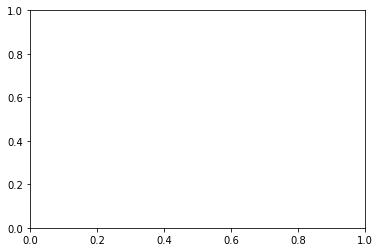

In [40]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)

In [41]:
ridge=Ridge(alpha=0.1)
ridge.fit(train_scaled,x_test)
print(ridge.score(train_scaled,x_test))
print(ridge.score(test_scaled,y_test))

0.9903815817570366
0.9827976465386916


In [44]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=10)
lasso.fit(train_scaled,x_test)
print(lasso.score(train_scaled,x_test))
print(lasso.score(test_scaled,y_test))

0.9888067471131867
0.9824470598706695
